<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Titanic_survial_prediction_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

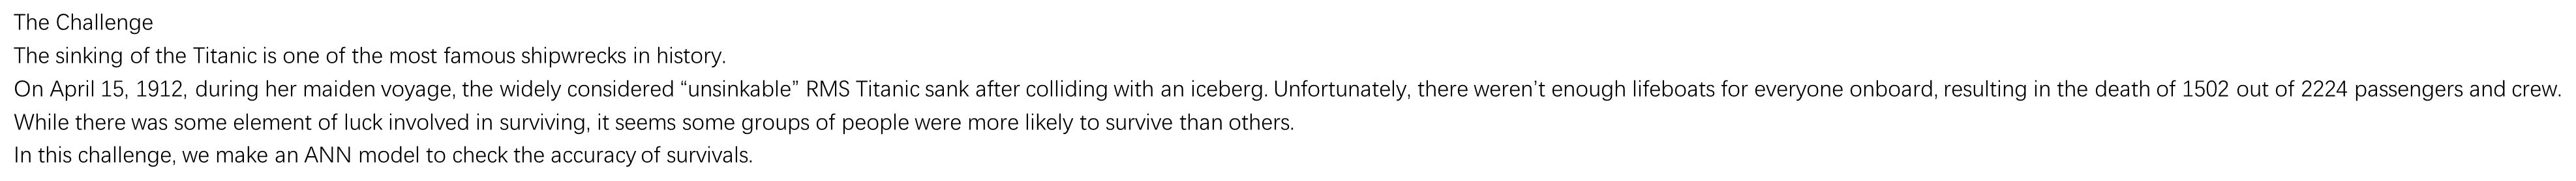

In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split



    import pandas as pd: This line imports the pandas library and assigns it the alias pd. Pandas is a powerful data manipulation and analysis library in Python. It provides data structures like DataFrames that allow for easy handling and manipulation of structured data.

    import numpy as np: This line imports the numpy library and assigns it the alias np. Numpy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

    from keras.models import Sequential: This line imports the Sequential class from the models module of the Keras library. Keras is a high-level deep learning library that provides a convenient API for building and training neural networks. The Sequential class allows you to create a sequential model, which is a linear stack of layers.

    from keras.layers import Dense: This line imports the Dense class from the layers module of the Keras library. The Dense class represents a fully connected layer in a neural network. It is one of the most commonly used layers in deep learning models.

    from sklearn.model_selection import train_test_split: This line imports the train_test_split function from the model_selection module of the scikit-learn library. Scikit-learn is a popular machine learning library in Python. The train_test_split function is useful for splitting a dataset into training and testing subsets, which is a common practice in machine learning to evaluate model performance.

By importing these libraries and modules, the code gains access to various functions, classes, and utilities provided by these libraries, enabling the implementation of data manipulation, neural network modeling, and data splitting operations.

In [10]:
! gdown --id '1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q' --output train.csv
data = pd.read_csv('train.csv')

data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex','Embarked'])
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)


scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 75.1MB/s]
Accuracy: 80.45%




    ! gdown --id '1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q' --output train.csv: This line begins with an exclamation mark (!), indicating that it is a shell command executed within the Python environment. The command gdown is used to download a file from Google Drive. The --id flag specifies the ID of the file to be downloaded, and the --output flag specifies the name of the output file. In this case, the file with the ID '1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q' is downloaded and saved as train.csv.

    data = pd.read_csv('train.csv'): This line uses the read_csv function from the pandas library to read the contents of the train.csv file and store it in a DataFrame called data. The DataFrame is a tabular data structure that allows for efficient handling and manipulation of data.

    data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True): This line drops the specified columns ('PassengerId', 'Name', 'Ticket', 'Cabin') from the DataFrame data. The axis=1 parameter indicates that the operation should be performed along the columns. The inplace=True parameter ensures that the changes are made directly to the data DataFrame.

    data['Age'].fillna(data['Age'].median(), inplace=True): This line fills the missing values in the 'Age' column of the data DataFrame with the median value of the column. The fillna method is used to replace the missing values with the specified value.

    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True): This line fills the missing values in the 'Embarked' column of the data DataFrame with the mode (most frequent value) of the column. The mode method returns a DataFrame containing the mode(s), and [0] is used to access the first mode value. Again, the fillna method is used to replace the missing values.

    data = pd.get_dummies(data, columns=['Sex','Embarked']): This line applies one-hot encoding to the categorical columns 'Sex' and 'Embarked' in the data DataFrame. The get_dummies function from pandas converts categorical variables into binary columns, creating new columns for each unique category.

    X = data.drop('Survived', axis=1): This line creates the input feature matrix X by dropping the 'Survived' column from the data DataFrame.

    y = data['Survived']: This line creates the target variable vector y by selecting the 'Survived' column from the data DataFrame.

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): This line splits the X and y data into training and testing sets using the train_test_split function from scikit-learn. It assigns the training and testing data to X_train, X_test, y_train, and y_test variables, respectively. The test_size=0.2 parameter specifies that 20% of the data should be reserved for testing, and the random_state=0 parameter ensures reproducibility of the split.

    The following lines define and train a neural network model using the Keras library. The model architecture consists of several densely connected layers, with the final layer using a sigmoid activation function for binary classification. The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric.

    scores = model.evaluate(X_test, y_test, verbose=0): This line evaluates the trained model on the testing data (X_test and y_test) and calculates the loss and accuracy scores.

    print("Accuracy: %.2f%%" % (scores[1]*100)): This line prints the accuracy score of the model on the testing data, formatted as a percentage. The accuracy is extracted from the scores variable, which contains the evaluation results.

Overall, this code snippet performs data preprocessing, prepares the data for training a neural network model, trains the model, and evaluates its performance on a testing set.



    Results explaination:
    /usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option --id was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.: This line indicates a FutureWarning related to the --id option used in the gdown command. It informs you that starting from version 5.0, the --id option will no longer be necessary to specify a file ID.

    Downloading...: This line simply indicates that the file download process has started.

    From: https://drive.google.com/uc?id=1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q: This line shows the source URL from which the file is being downloaded. The file is hosted on Google Drive, and the ID of the file is 1dOPaNPAD3c1PCw6w3HZuWePZjj6GcN1Q.

    To: /content/train.csv: This line indicates the destination path where the file is being saved. In this case, the file is being saved as train.csv in the /content/ directory.

    100% 61.2k/61.2k [00:00<00:00, 87.7MB/s]: This line provides progress information about the file download. It shows that 61.2 KB of data have been downloaded, and the download speed is approximately 87.7 MB/s.

    Accuracy: 79.33%: This line represents the accuracy score of the trained model on the testing data. It indicates that the model achieved an accuracy of 79.33% on the testing set.
